# Female representation, across all divisons, across all ranks

Source: [University Senate's 2015 Pipeline report](http://senate.columbia.edu/archives/reports_archive/14-15/csw_pipeline%20report_2004-13.pdf)

In this notebook we want to have a look at female representation by academic division and rank. We will look at the Arts and Sciences (A&S) and its three academic divisions—Humanities (HUM), Natural Sciences (NS), and Social Sciences (SS)—and four academic ranks-Undergraduate Major and Concentrator Students (UC), Graduate Students (GS), Tenure Eligible Faculty (TE), and Tenured Faculty (TF).

In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 18})

In [20]:
YEARS = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

with open('../data/pipe_counts.json') as f:
    pipeCounts = json.load(f)

divisions = [
    ('Arts and Sciences', 'A&S'),
    ('Humanities', 'HUM'),
    ('Natural Sciences', 'NS'),
    ('Social Sciences', 'SS'),
]

ranks = [
    ('Undergraduate Major and Concentrator Students', 'UG'),
    ('Graduate Students', 'GS'),
    ('Tenure Eligible Faculty', 'TE'),
    ('Tenured Faculty', 'TF'),
]

def requestTable(div, rank, years=YEARS):
    try:
        divName = divisions[div][0]
        rankName = ranks[rank][0]
    except (IndexOutOfBoundsError, TypeError) as e:
        print('Table could not be retrieved.')
        
    df = pd.DataFrame([YEARS] + pipeCounts[divName][rankName])
    df = df.rename({0:'Year', 1: 'Women', 2: 'Men'}).T    
    if len(years) < len(YEARS): # we specified a few years only
        df = df.loc[df['Year'].isin(years)].reset_index()
    return df

## We've seen the Leaking Pipeline. How can we effectively visualize that disparity?

Referring to The Leaking Pipeline article from The Eye published a few months ago.

Let's start with comparison plots.

In the following 16 charts we visualize female representation in each academic rank of each academic division. In the vertical axis we represent the number of women, in the horizontal axis the number of men. Each axis encompasses the same range. This is so we can easily visualize a 1:1 line (which represents an equal number of men and women) and compare the proportion of women over men.

In [21]:
def plotSquare(plot, div, rank, equality=True, abbreviate=True, years=YEARS, line=True, yzero=False, annotate=True, verbose=False):
    labelIndex = 1 if abbreviate else 0
    title = 'Women vs. Men {} in {}'.format(
                ranks[rank][labelIndex], 
                divisions[div][labelIndex]
            )
    plot.set_title(title)
    
    table = requestTable(div, rank, years=years)
    plotterFn = plot.plot if line else plot.scatter
    plotterFn(table['Men'], table['Women'], linestyle='--', marker='o', color='b')
    plot.set_xlabel('Number of Men')
    plot.set_ylabel('Number of Women')
    
    axMin = min(min(table['Women']), min(table['Men']))
    axMax = max(max(table['Women']), max(table['Men']))
    padding = int((axMax - axMin) * 0.1)
    axMin -= padding
    axMax += padding
    if yzero:
        axMin = 0
    plot.axis(xmin=axMin,xmax=axMax,ymin=axMin,ymax=axMax)
    
    plot.grid('scaled', linestyle='dotted')
    
    if equality: # graph equality line
        plot.plot([axMin, axMax], [axMin, axMax], linestyle='--', marker='', color='#aaaaaa')
        
    if annotate:
        for y in range(0, len(years), (len(years) - 1 if annotate == 'ends' else 1)):
            plot.annotate(table['Year'][y], (table['Men'][y], table['Women'][y]))
            
    if verbose:
        print('=== {} ==='.format(title))
        print('range: [{}, {}]'.format(axMin, axMax))

In [22]:
def sketchComparisonPlot():
    # Sketches a skeleton of a comparison plot
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    ax.set_title('Female vs. Male in Division A and Rank B')
    ax.set_xlabel('Number of Men')
    ax.set_ylabel('Number of Women')
    ax.axis(xmax=500,ymax=500)
    ax.grid('scaled', linestyle='dotted')
    ax.plot([0, 500], [0, 500], linestyle='--', marker='', color='#aaaaaa')

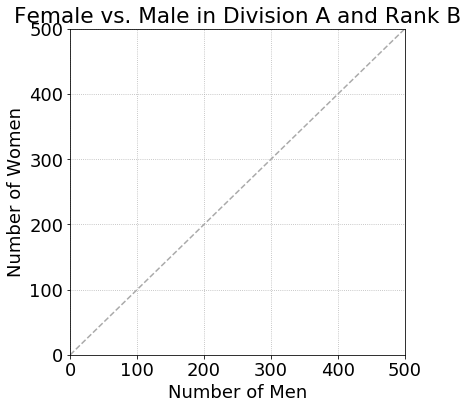

In [23]:
sketchComparisonPlot()

# After looking at 16 charts,

I noticed a striking result in the Humanities: women make a strong majority among undergraduate students, but tenured faculty are predominantly male.

Let's plot this one more time, side by side.

In [24]:
def drawHumanitiesComparisons():
    fig, ax_lst = plt.subplots(1, 2, figsize=(16,8))
    for r in range(2):
        plotSquare(ax_lst[r], 1, r*3, abbreviate=True, line=False, annotate='ends')

    # plt.savefig('output.pdf', transparent=True)

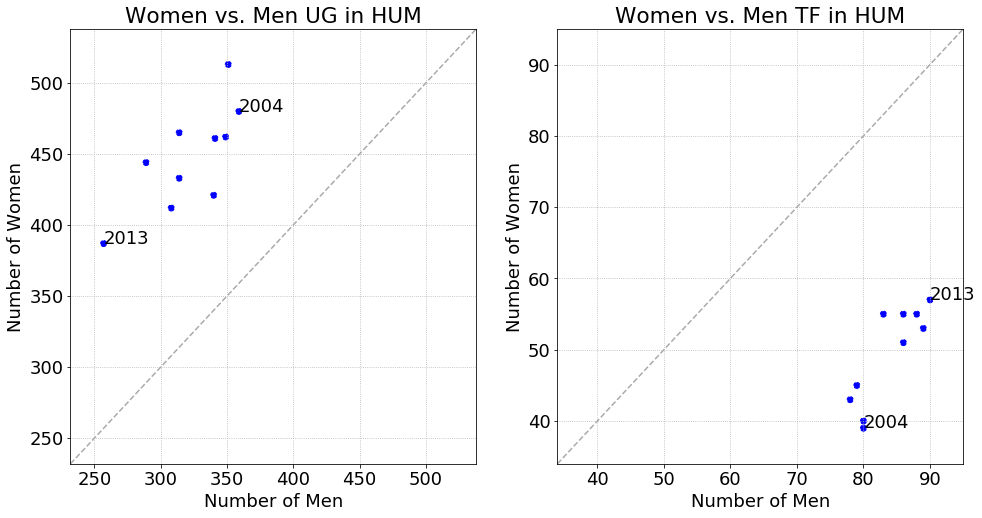

In [25]:
drawHumanitiesComparisons()

# After a while in Illustrator...

![alt text](https://raw.githubusercontent.com/jsonkao/CU-female-representation/master/img/Humanities%20UC%20vs.%20TF%404x.png)

In [51]:
def drawArtsAndSciencesComparisons():
    fig, ax_lst = plt.subplots(1, 2, figsize=(16,8))
    for r in range(2):
        plotSquare(ax_lst[r], 0, r*3, abbreviate=True, line=False, annotate='ends')

    # plt.savefig('output.pdf', transparent=True)

# Where comparison plots don't work as well: near-parity

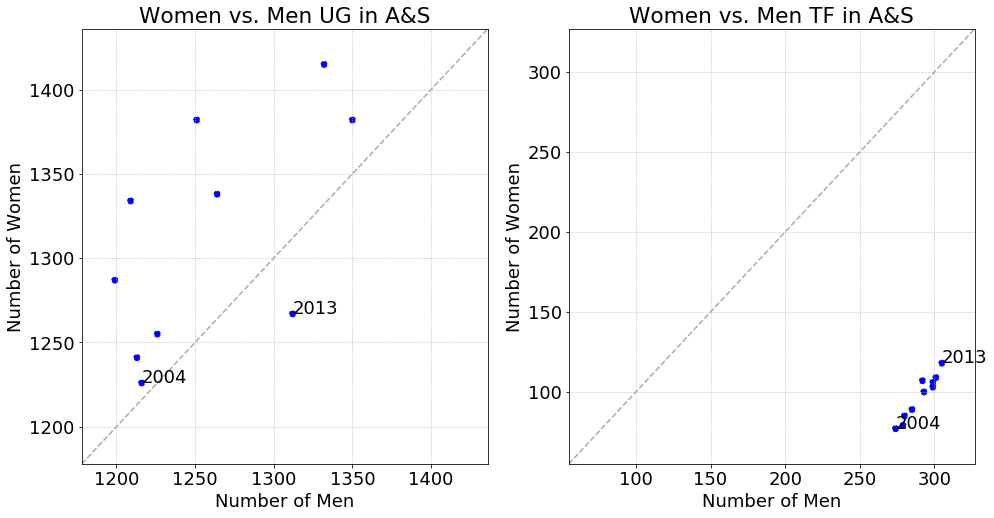

In [52]:
drawArtsAndSciencesComparisons()

Data for charts available here: https://docs.google.com/spreadsheets/d/1vX_t6HtxZjPXLaRRiWkWmsPKHn2jAv93y_ryYzUFzKU/edit?usp=sharing

## We've looked at proportions. What about totals?

In the charts we've looked at so far, we have compared the proportion of men and women in each academic division and rank.

Let's take a look at the totals. We can simplify the charts to totals over time using a line chart, with one line representing the female headcount, and another representing the male headcount.

In [26]:
def plotLines(plot, div, rank, abbreviate=True):
    labelIndex = 1 if abbreviate else 0
    plot.set_title('Total Women vs. Men {} in {}'.format(ranks[rank][labelIndex], divisions[div][labelIndex]))
    
    table = requestTable(div, rank)
    plot.plot(table['Year'], table['Men'], linestyle='-', marker='', color='b', label='Men')
    plot.plot(table['Year'], table['Women'], linestyle='-', marker='', color='g', label='Women')
    
    plot.set_xlabel('Year')
    plot.set_ylabel('Number of People')
    plot.axis(ymin=0)
    plot.legend()
    
    plot.yaxis.grid(True)

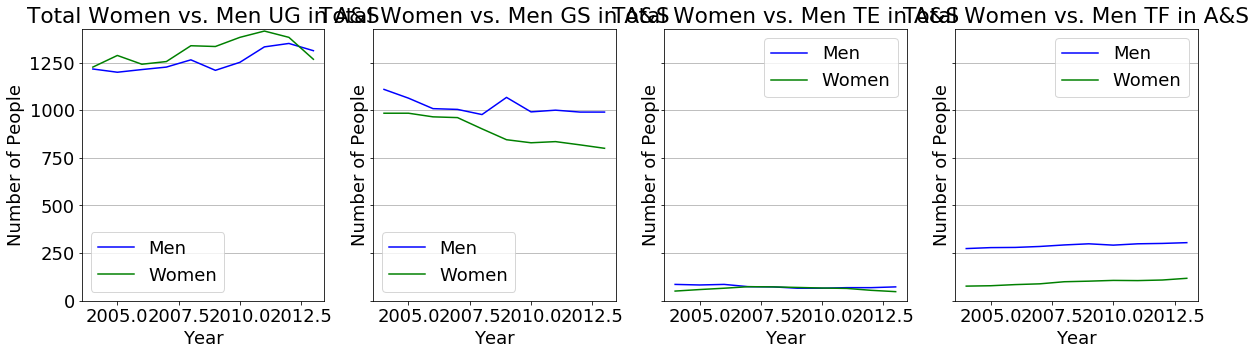

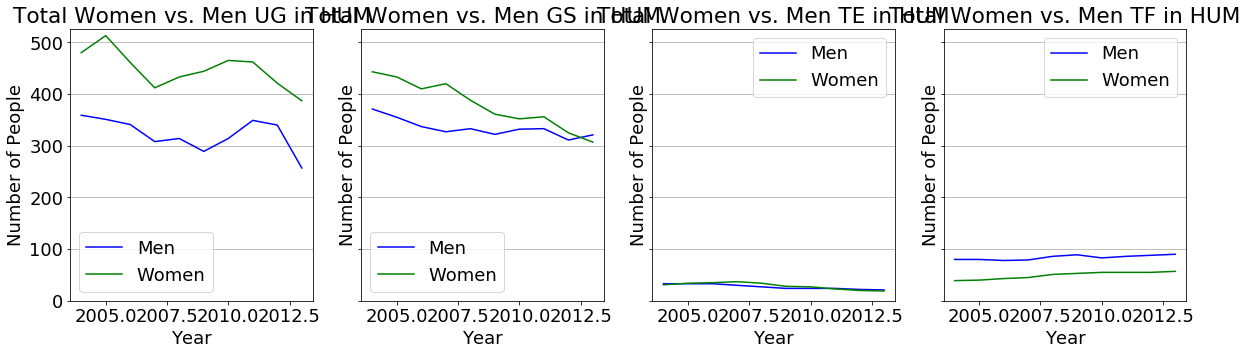

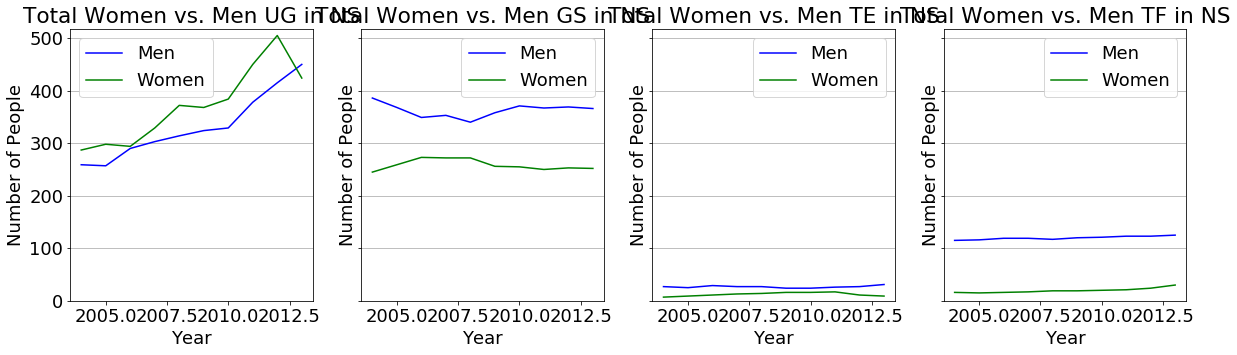

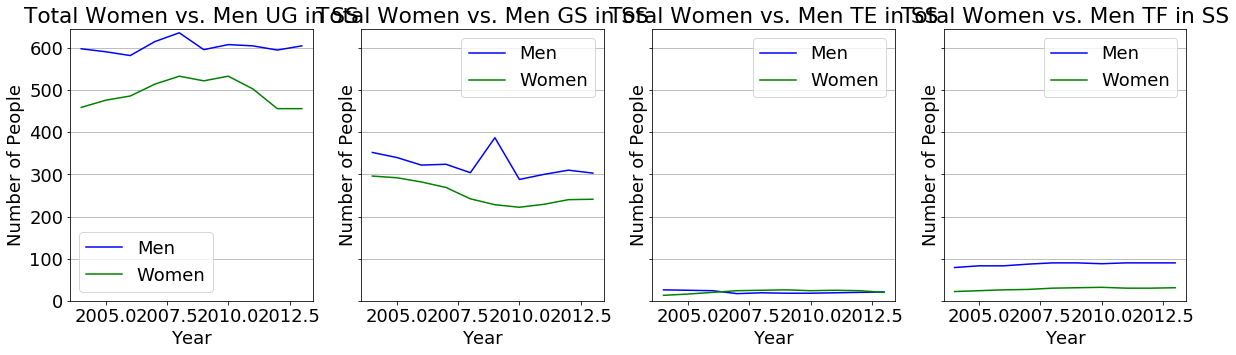

In [27]:
for d in range(len(divisions)):
    fig, ax_lst = plt.subplots(1, len(ranks), figsize=(20,5), sharey=True)
    for r in range(len(ranks)):
        plotLines(ax_lst[r], d, r)

Through this type of visualization we notice large representation gaps in A&S, HUM, and NS, and a slightly smaller gap in SS, between UC and TF. (And notice how the Men and Women lines in HUM swap places between UC and TF).

Earlier we noticed a sizable drop in female representation from the undergraduate to graduate levels in Natural Sciences. Let's plot this.

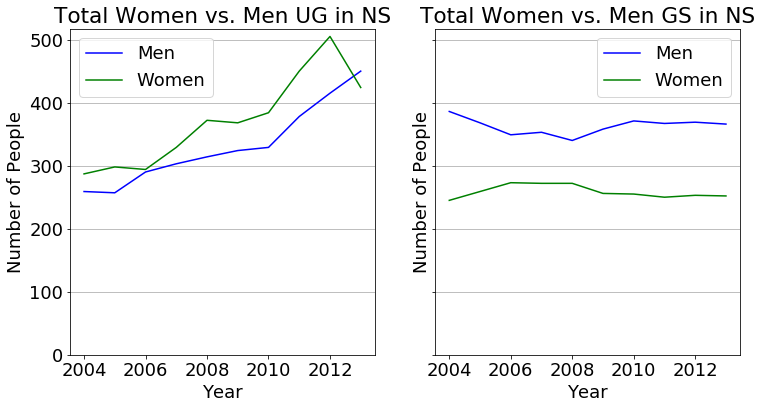

In [28]:
fig, ax_lst = plt.subplots(1, 2, figsize=(12,6), sharey=True)
for r in range(2):
    plotLines(ax_lst[r], 2, r)

There are so many disappointing trends to study from the report, but we can only focus on the most powerful few. Let's take the front and end of the pipeline: undergraduate (UC) and tenured (TF).

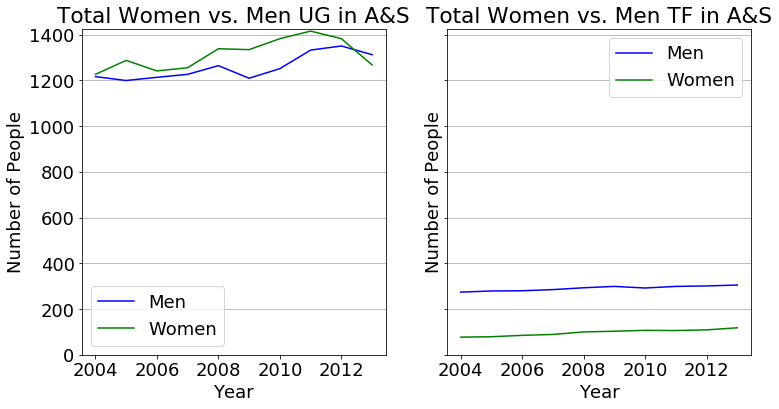

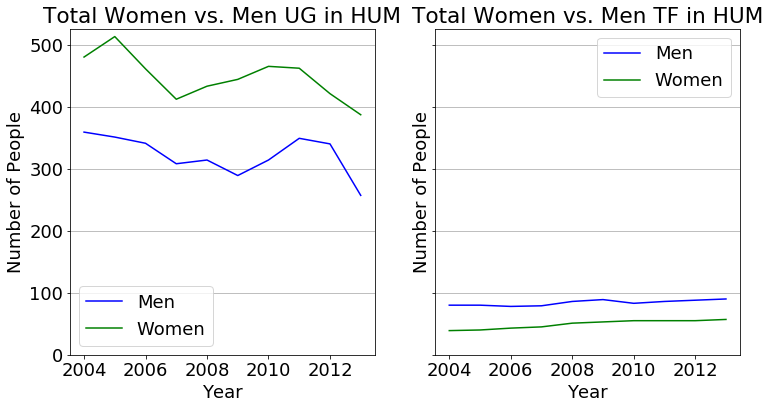

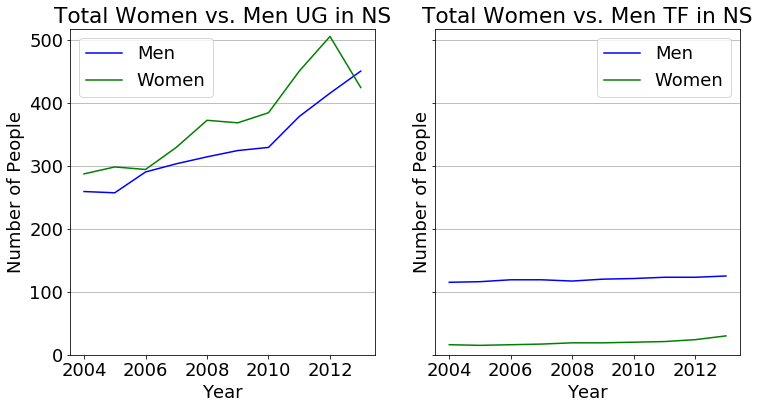

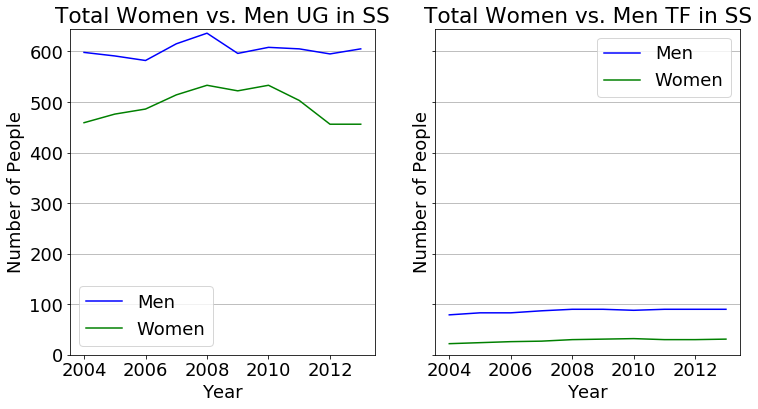

In [29]:
for d in range(len(divisions)):
    fig, ax_lst = plt.subplots(1, 2, figsize=(12,6), sharey=True)
    for r in range(2):
        plotLines(ax_lst[r], d, r*3)

How can we more effectively show the gaps?

## You-Draw-It

Let's try a you-draw-it interactive. Since there are two lines, to simplify the user experience in a you-draw-it, let's only plot one line: percent female. Let's graph the before (UC) and after's (TF) for our four proposed you-draw-it's.

In [30]:
def plotPercentLines(plot, div, abbreviate=True):
    labelIndex = 1 if abbreviate else 0
    plot.set_title('{} and {} by Gender in {}'.format(ranks[0][labelIndex], ranks[3][labelIndex], divisions[div][labelIndex]))

    tfTab = requestTable(div, 3)    
    plot.plot(
        tfTab['Year'], 
        tfTab['Women'] / (tfTab['Women'] + tfTab['Men']),
        linestyle='-', marker='', 
        color='black',
        label=ranks[3][labelIndex]
    )
        
    plot.set_xlabel('Year')
    plot.set_ylabel('Percent of People')
    plot.legend()
    
    ucTab = requestTable(div, 0)
    percents = ucTab['Women'] / (ucTab['Women'] + ucTab['Men'])
    plot.fill_between(ucTab['Year'], percents, 0, facecolor='#99d8c9', interpolate=True)
    plot.fill_between(ucTab['Year'], 1, percents, facecolor='#fdbb84', interpolate=True)
    
    plot.axis(ymin=0, ymax=1)
    plot.axhline(y=0.5, linestyle='--', color='#aaaaaa')

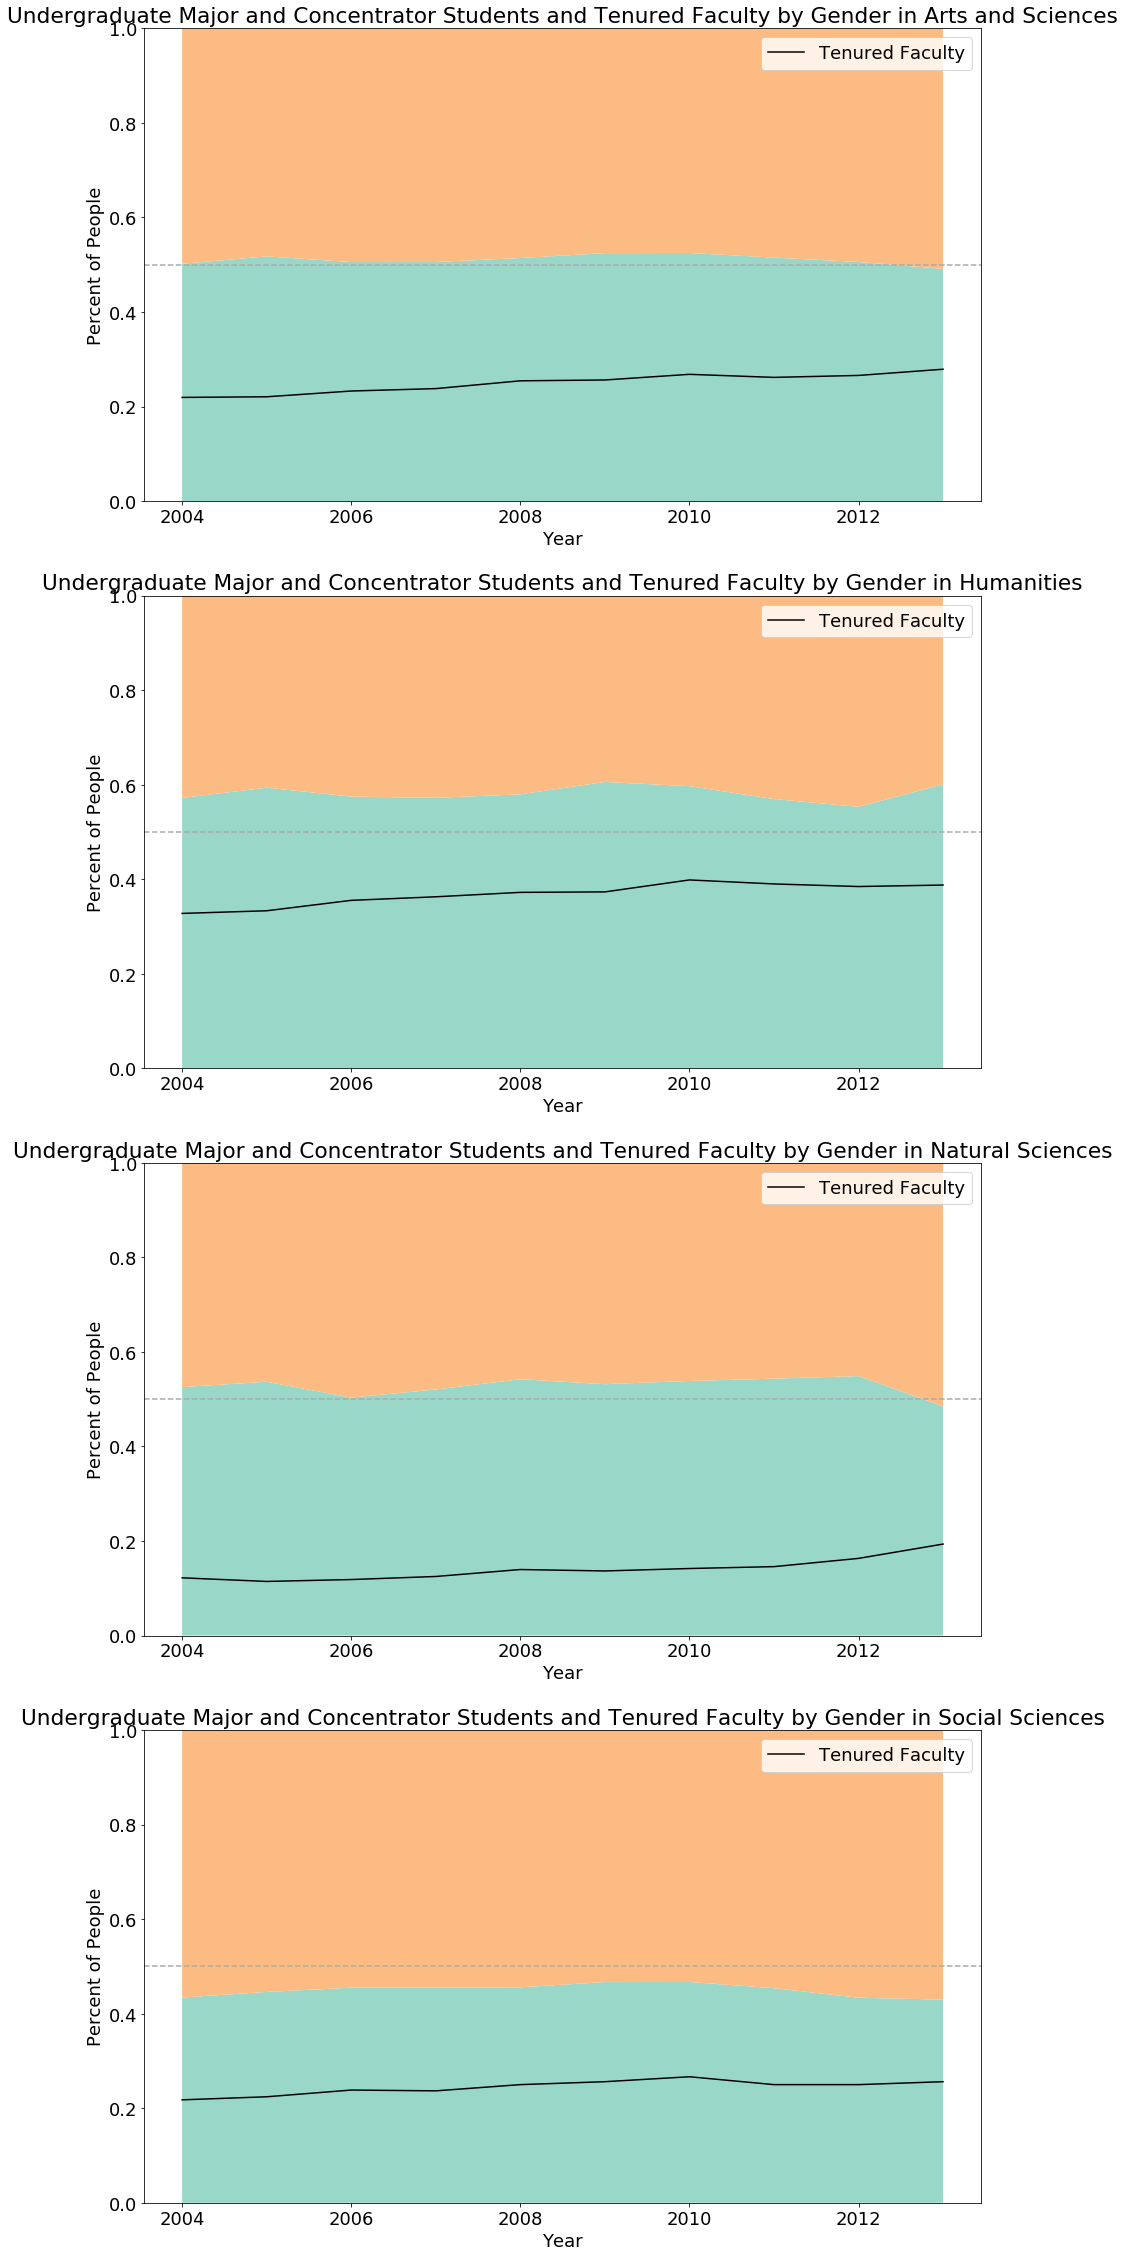

In [31]:
fig, ax_lst = plt.subplots(4, 1, figsize=(15,40), sharey=True)
for d in range(len(divisions)):
    plotPercentLines(ax_lst[d], d, abbreviate=False)

I like this, but it may be hard to give you-draw-it instructions for this layout. Let's try a side-by-side layout.

In [32]:
def plotFemalePercentLine(plot, div, rank, abbreviate=True, fill=True):    
    labelIndex = 1 if abbreviate else 0
    plot.set_title('{} by Gender in {}'.format(ranks[rank][labelIndex], divisions[div][labelIndex]))
    table = requestTable(div, rank)
    percents = table['Women'] / (table['Women'] + table['Men'])
    plot.set_xlabel('Year')
    plot.set_ylabel('Percent of People')
    
    plot.axis(ymin=0, ymax=1)
    plot.axhline(y=0.5, linestyle='--', color='#aaaaaa')
    
    plot.plot(table['Year'], percents, linestyle=('' if fill else '-'), marker='', color='black')
    if fill:
        plot.fill_between(table['Year'], percents, 0, facecolor='#99d8c9', interpolate=True)
        plot.fill_between(table['Year'], 1, percents, facecolor='#fdbb84', interpolate=True)

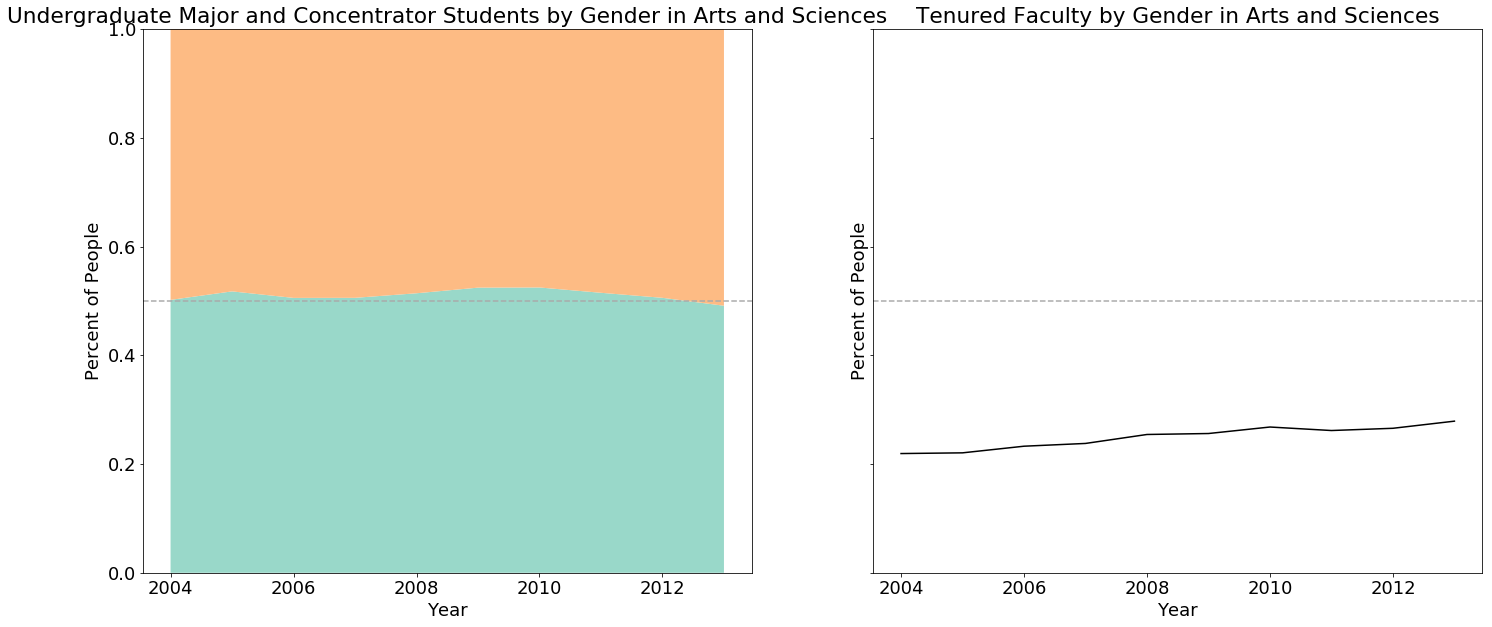

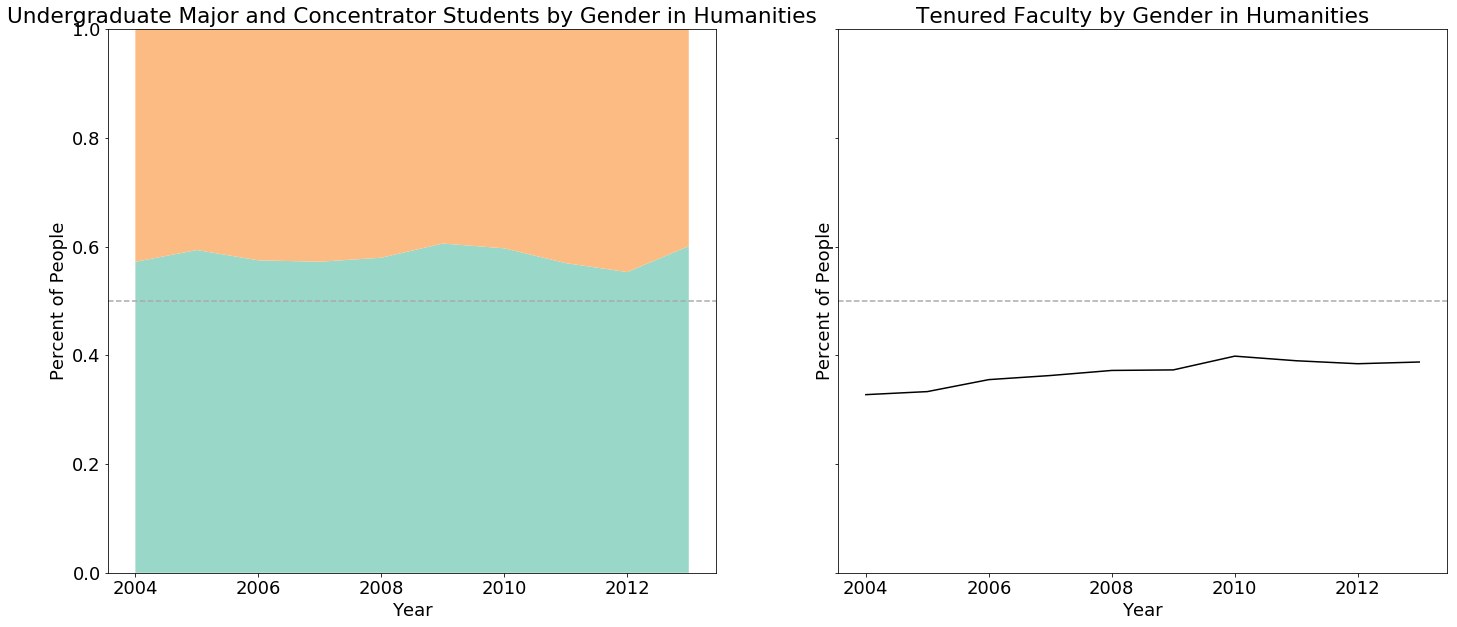

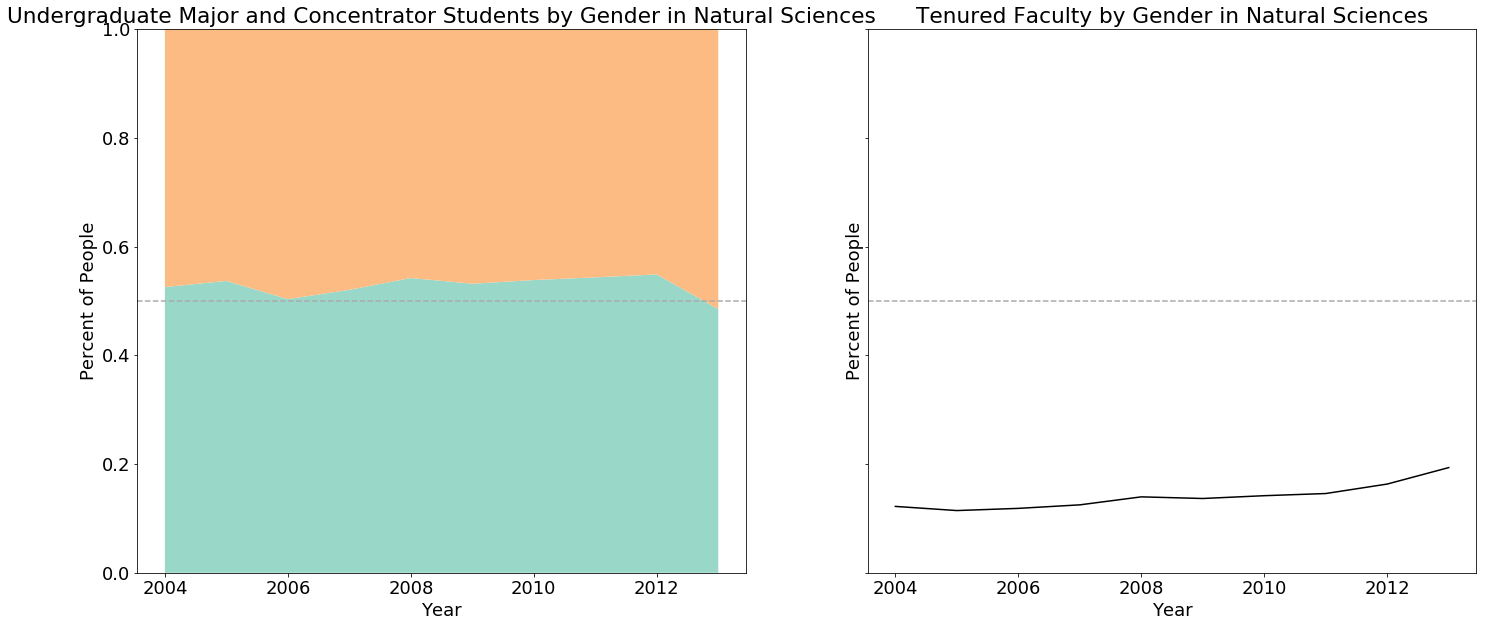

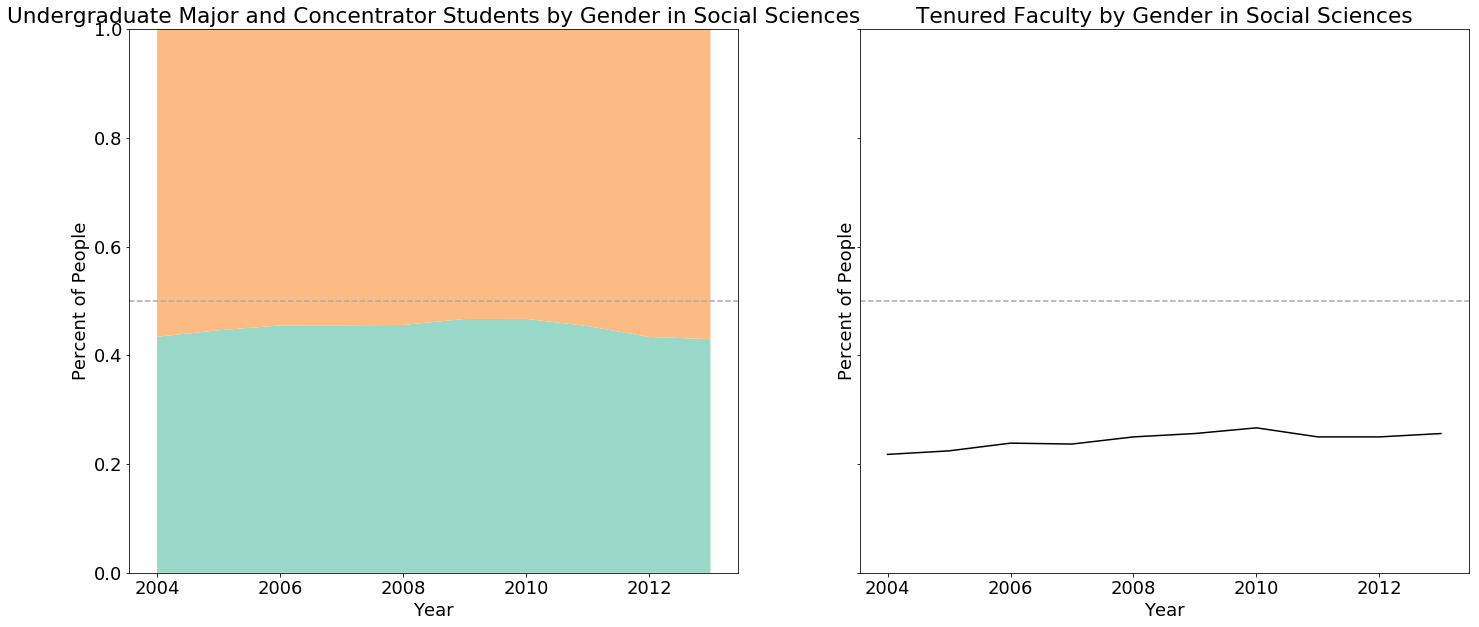

In [33]:
for d in range(len(divisions)):
    fig, ax_lst = plt.subplots(1, 2, figsize=(24,10), sharey=True)
    for r in range(2):
        plotFemalePercentLine(ax_lst[r], d, r*3, abbreviate=False, fill=(r == 0))

**(Note to self: This will be the interactive graphic.)**

A few notes for the actual implementation:
- The graph on the right will be blank. Instructions: "Draw the line for..."
- Label the `y=0.5` as the equality line ("Equal Number of Men and Women")
- Use a light-colored `fill_between` for the UC graph that the TF line will then overlay. Label the two sides "Women" and "Men".